In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/household_power_consumption.zip
!unzip household_power_consumption.zip
!ls


--2025-11-02 21:14:48--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/household_power_consumption.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/zip]
Saving to: ‘household_power_consumption.zip’

household_power_con 100%[===================>]  19.68M  49.0MB/s    in 0.4s    

2025-11-02 21:14:49 (49.0 MB/s) - ‘household_power_consumption.zip’ saved [20640916/20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  
household_power_consumption.txt  household_power_consumption.zip  sample_data


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    parse_dates={'datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    na_values=['?'],
    low_memory=False
)

df.head()


/tmp/ipython-input-827911219.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipython-input-827911219.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipython-input-827911219.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
# Step 3: Filter data for the dates 2007-02-01 and 2007-02-02
df = df[(df['datetime'] >= '2007-02-01') & (df['datetime'] <= '2007-02-02')]

# Drop missing values (if any)
df = df.dropna()

# Convert columns to numeric (in case some are read as strings)
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[cols] = df[cols].apply(pd.to_numeric)

# Display the first few rows
df.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,2007-02-01 00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
66637,2007-02-01 00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
66638,2007-02-01 00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
66639,2007-02-01 00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
66640,2007-02-01 00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


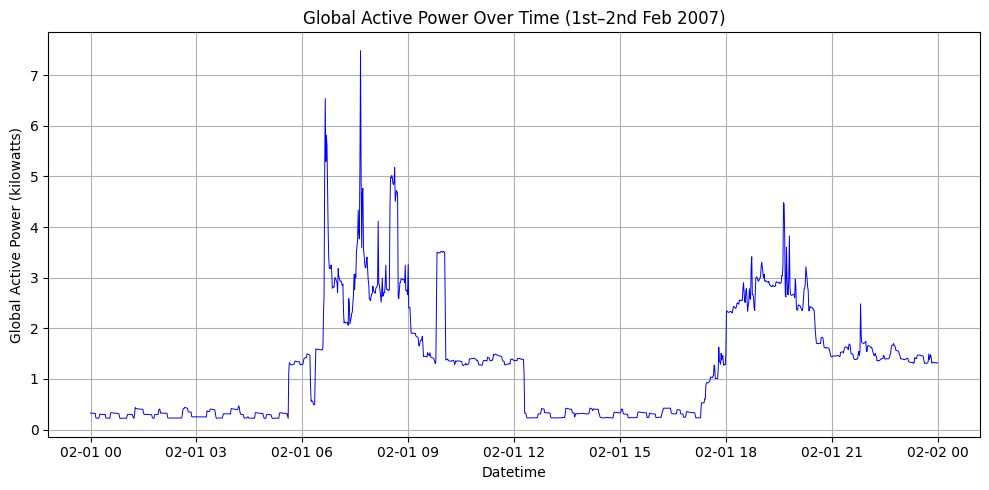

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['Global_active_power'], color='blue', linewidth=0.7)
plt.title('Global Active Power Over Time (1st–2nd Feb 2007)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.tight_layout()
plt.show()


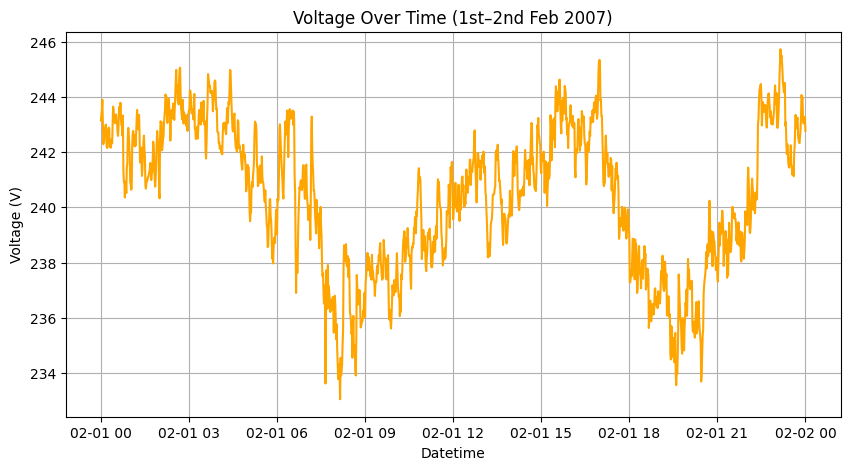

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['datetime'], df['Voltage'], color='orange')
plt.title('Voltage Over Time (1st–2nd Feb 2007)')
plt.xlabel('Datetime')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()


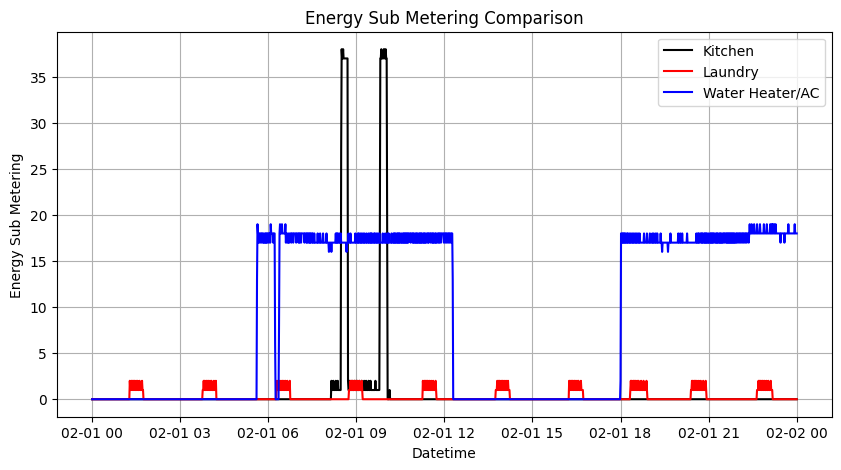

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['datetime'], df['Sub_metering_1'], label='Kitchen', color='black')
plt.plot(df['datetime'], df['Sub_metering_2'], label='Laundry', color='red')
plt.plot(df['datetime'], df['Sub_metering_3'], label='Water Heater/AC', color='blue')
plt.title('Energy Sub Metering Comparison')
plt.xlabel('Datetime')
plt.ylabel('Energy Sub Metering')
plt.legend()
plt.grid(True)
plt.show()


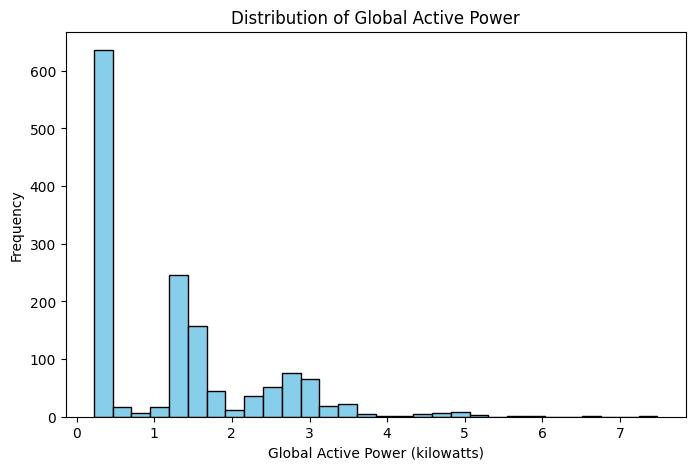

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['Global_active_power'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()


In [8]:
print("✅ Project Summary:")
print("- Dataset: Household Power Consumption Dataset (2006–2010)")
print("- Cleaned and filtered data for 1st–2nd February 2007")
print("- Visualized Global Active Power, Voltage, and Sub-Metering values")
print("- Observed variations in power usage across different household activities")
print("- Tools used: Python, Pandas, Matplotlib, Colab")
print("\n🎯 Project Completed Successfully for Internship Submission!")


✅ Project Summary:
- Dataset: Household Power Consumption Dataset (2006–2010)
- Cleaned and filtered data for 1st–2nd February 2007
- Visualized Global Active Power, Voltage, and Sub-Metering values
- Observed variations in power usage across different household activities
- Tools used: Python, Pandas, Matplotlib, Colab

🎯 Project Completed Successfully for Internship Submission!
